# Tarea Programada 01 - Métodos Matemáticos de Física

### Estudiante: Ma Jimena Hernández T
### Carné: B73729

# Ejercicio 1

### Descripción 

Se define una función f(x), la cual es una combinación de dos escalones, ubicados en los intervalos [-2a, -a], con un valor igual a 1 y 0 respectivamente. Seguidamente, se realiza una gráfica para mostrar los resultados de su comportamiento. En el siguiente punto, se obtiene la transformada de Fourier F(k) de la función f(x), mediante una función "np.fft.fft". Esto para realizar la multipliación y así poder graficar A(k) en función de k, donde k es la frecuencia en el dominio de Fourier. 

Asimismo, para el punto donde se requiere cambiar el ancho de ambos escalones, se modifica el valor de 'a' (mediante una lista con diversos valores), y se vuelve a calcular A(k) de la misma forma que el inciso anterior, dando paso al espectro de gráficas.  

#### 1.1 Calcule la transformada de Fourier numérica de f(x)

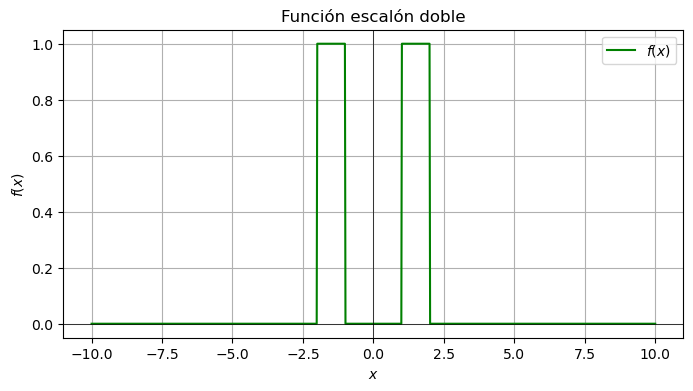

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
L = 10   # Rango del dominio de x
N = 1000 # Número de puntos
a = 1    # Ancho de los escalones

# Definir dominio x
x = np.linspace(-L, L, N)

# Definir la función f(x) con dos escalones
f_x = np.where((np.abs(x) > a) & (np.abs(x) < 2*a), 1, 0)

# Graficar la función
plt.figure(figsize=(8,4))
plt.plot(x, f_x, label='$f(x)$', color='g')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Función escalón doble')
plt.legend()
plt.grid()
plt.show()

#### 1.2. Grafique la función A(k) = F(k)*conjugado

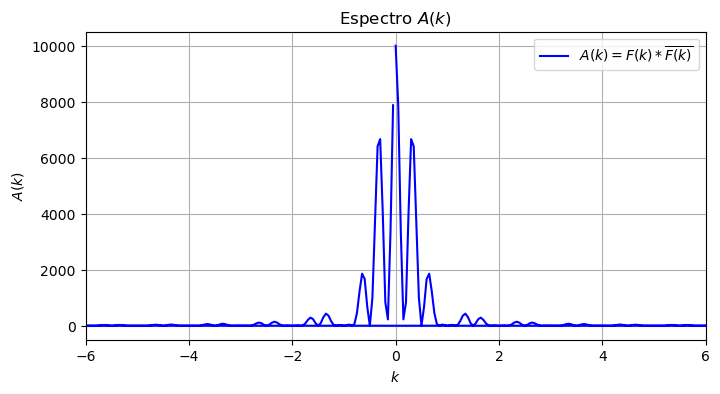

In [163]:
# Calcular transformada de Fourier de f(x)
F_k = np.fft.fft(f_x)

# Calcular A(k) = F(k) * F(k).conj()
A_k = np.abs(F_k)**2

# Definir dominio de frecuencias k
k = np.fft.fftfreq(N, (x[1] - x[0]))

# Graficar A(k)
plt.figure(figsize=(8,4))
plt.plot(k, A_k, label='$A(k) = F(k) * \\overline{F(k)}$', color='b')
plt.xlabel('$k$')
plt.ylabel('$A(k)$')
plt.title('Espectro $A(k)$')
plt.legend()

plt.xlim(-6, 6)
plt.grid()
plt.show()

#### 1.3. Grafique la funcion A(k) cuando se cambia el ancho de ambos escalones


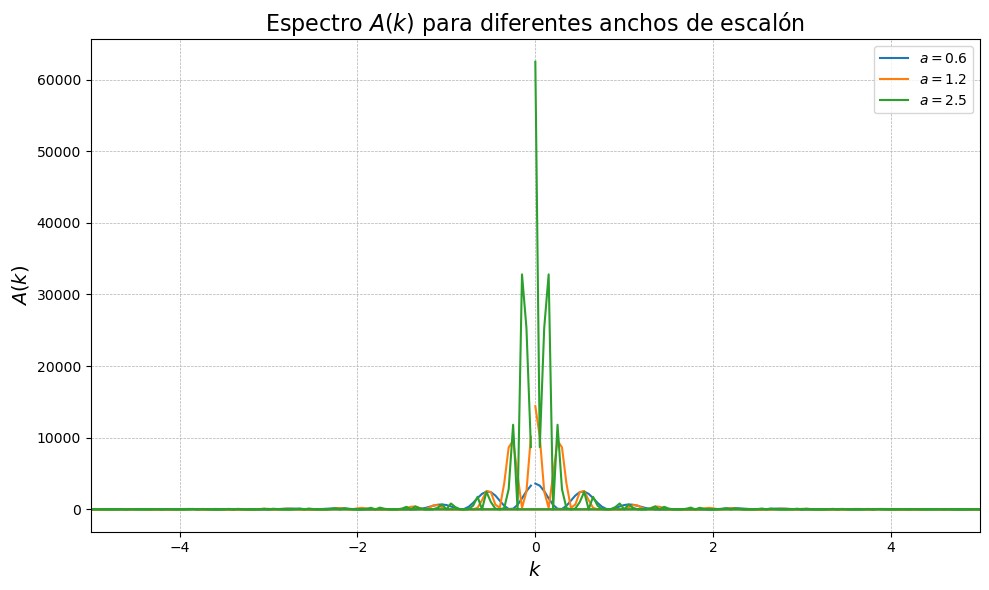

In [166]:
# Definir parámetro
a_values = [0.6, 1.2, 2.5]  # Diferentes anchos de los escalones

# Usar fftshift para centrar las frecuencias en k = 0
k_shifted = np.fft.fftshift(k)

# Crear una figura para gráficas
plt.figure(figsize=(10,6))

# Graficar A(k) para diferentes anchos de escalón
for a in a_values:
    # Definir la función f(x) con dos escalones para el valor de 'a'
    f_x = np.where((np.abs(x) > a) & (np.abs(x) < 2*a), 1, 0)

    # Calcular la transformada de Fourier de f(x)
    F_k = np.fft.fft(f_x)
    
    # Calcular A(k) = F(k) * F(k).conj()
    A_k = np.abs(F_k)**2
    
    # Graficar A(k)
    plt.plot(k, A_k, label=f'$a = {a}$')

plt.xlabel('$k$', fontsize=14)
plt.ylabel('$A(k)$', fontsize=14)
plt.title('Espectro $A(k)$ para diferentes anchos de escalón', fontsize=16)
plt.legend()

plt.xlim(-5, 5) 

# Cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### 1.4. Considere una onda luminosa plana que pasa por dos rendijas. ¿Qué relación tiene la función A(k) que se calculó arriba con el patrón que la luz hace en una pared muy lejana? Revise su conocimiento de óptica odulatoria y escriba la ecuación que se está resolviendo con este ejercicio.

Se puede decir que la función A(k) representa la intensidad en el dominio de Fourier, la cual describe la apertura de las dos rendijas. Esta función se relaciona con la interferencia y difracción, al observar una pantalla muy lejana, cuando una onda luminosa pasa por dos rendijas. Ahora bien, como caso particular del Principio de Huygens-Fresnel, se tiene la difracción de Fraunhofer. En este se denota que la distribución de luz en la pantalla es proporcional al cuadrado del módullo de la transformada de Fourier. Tomando en consideración que la apertura está formada por dos rendijas de ancho 'a' y separadas por una distancia 'd', de manera general se describe la ecuación: 

$$ I(k) = A(k) = |F(k)|^2 = \left[ 2 \cos\left(\frac{k d}{2} \right) \operatorname{sinc}(k a) \right]^2 $$

Donde se representa la difracción debida al ancho de cada rendija, la interferencia entre las dos rendijas y el número de onda en función del ángulo de observación.  



# Ejericio 2

### Descripción

Primero se requiere crear una función en un dominio bidimensional, en donde se definen los parámetros (radio, límite del dominio y número de puntos). Seguidamente, se crean las coordenadas x & y. Luego se define la función f(r), para así poder calcular la transformada de Fourier bidimensional numérica, tal como el inciso anterior, y calcular su magnitud, mediante el comando "np.abs" . Finalmente, se obtiene la gráfica de la función original, y la de la transformada, utilizando "imshow".



#### Calcule la transformada de Fourier numérica bidimensional de la función f(r), descrita en las indicaciones, es decir, un círuclo. Grafique la función F(k)*conjugado, como en el ejercicio anterior. En Python, utilice imshow o pcolormesh

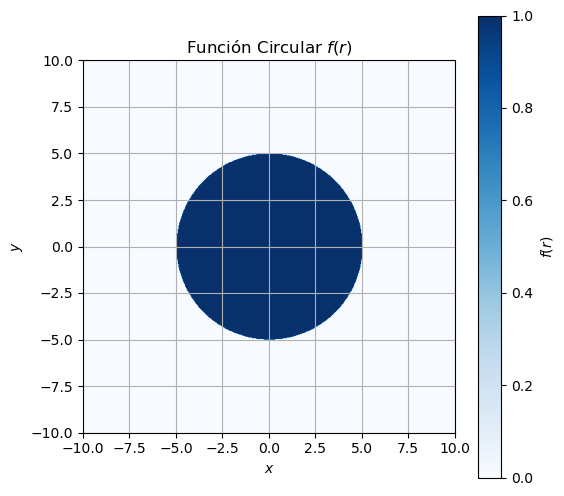

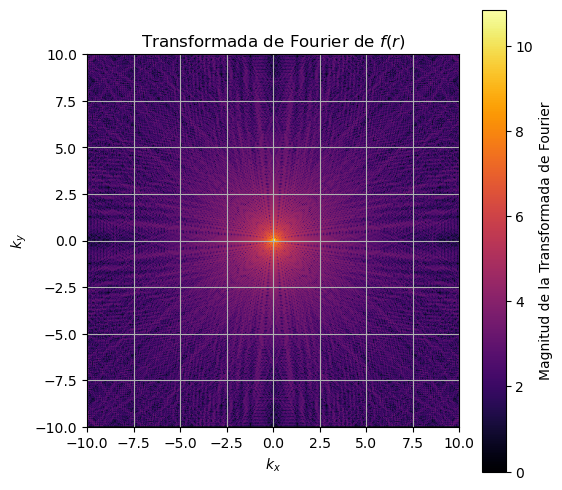

In [173]:
# Parámetros
a = 5  # Radio del círculo
L = 10  # Límite del dominio
N = 512  # Tamaño malla

# Crear dominio coordenadas cartesianas
x = np.linspace(-L, L, N) 
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y) # Malla 2D de las coordendas x & y 

# Definir función f(r)
r = np.sqrt(X**2 + Y**2)
f_r = np.where(r <= a, 1, 0)

# Graficar f(r)
plt.figure(figsize=(6,6))
plt.imshow(f_r, extent=(-L, L, -L, L), origin='lower', cmap='Blues')
plt.colorbar(label='$f(r)$')
plt.title('Función Circular $f(r)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

# Calcular transformada de Fourier bidimensional
f_r_fou = np.fft.fftn(f_r)

# Calcular magnitud
f_r_fou_mag = np.abs(np.fft.fftshift(f_r_fou))

# Graficar magnitud 
plt.figure(figsize=(6,6))
plt.imshow(np.log(f_r_fou_mag + 1), extent=(-L, L, -L, L), origin='lower', cmap='inferno')
plt.colorbar(label='Magnitud de la Transformada de Fourier')
plt.title('Transformada de Fourier de $f(r)$')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.grid(True)
plt.show()

# Ejericio 3

### Descripción

Luego de cargar los datos de cada archivo, se requiere definir un array 't' con su respectiva cantidad de muestras, para poder graficar cómo varía la amplitud con respecto al tiempo. Seguidamente, se calcula la transformada de Fourier de cada señal, para luego obtener las frecuencias correspondientes, y así poder analizarlas. Asimismo, se realiza el calculo de la magnitud de cada componente para poder decifrar la intensidad que tiene cada frecuencia original. Finalmente, mediante la detección de picos en las magnitudes, se pueden identificar las frecuencias dominantes y así determinar los tonos predominantes en cada onda sonora.

#### 3.1. Graficar cada onda sonora en función del tiempo

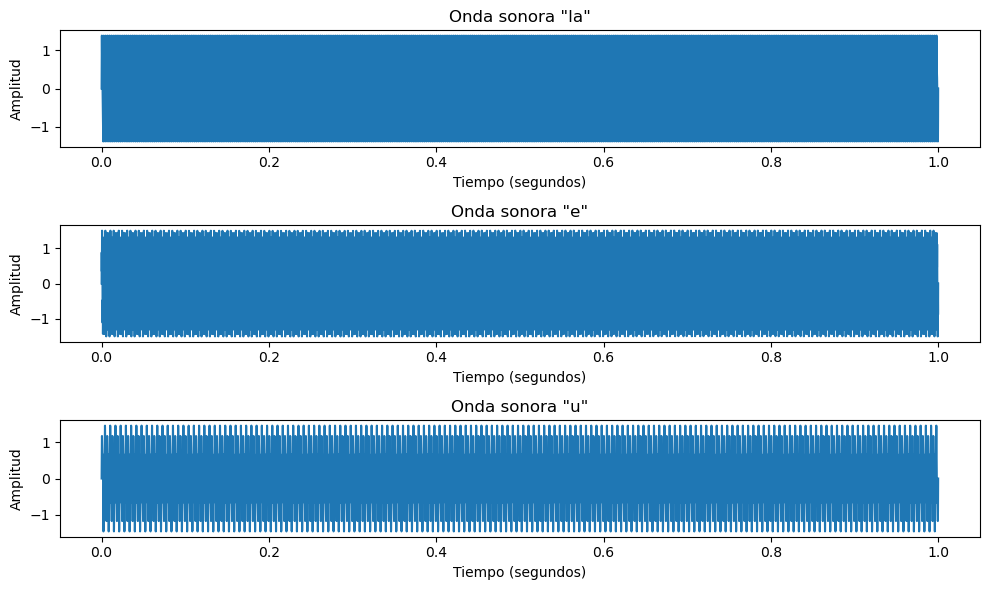

In [178]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

# Cargar archivos
signal_la = np.loadtxt('signal1.txt')  # Nota "La"
vocal_e = np.loadtxt('vocalE.txt')    # Vocal "E"
vocal_u = np.loadtxt('vocalU.txt')    # Vocal "U"

# Array de tiempo de 0 a 1 segundo (44100 muestras)
t = np.linspace(0, 1, 44100)

# Grafica ondas sonoras
plt.figure(figsize=(10, 6))

# Gráfica onda "la"
plt.subplot(3, 1, 1)
plt.plot(t, signal_la)
plt.title('Onda sonora "la"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

# Gráfica onda "e"
plt.subplot(3, 1, 2)
plt.plot(t, vocal_e)
plt.title('Onda sonora "e"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

# Gráfica onda "u"
plt.subplot(3, 1, 3)
plt.plot(t, vocal_u)
plt.title('Onda sonora "u"')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


#### 3.2. Calcule la transformada numérica de Fourier de cada señal 

In [181]:
# Calcular transformada de Fourier de cada señal
F_la = fft(signal_la)
F_e = fft(vocal_e)
F_u = fft(vocal_u)

# Calcular frecuencias asociadas
frequencies = fftfreq(len(t), t[1] - t[0])

# Magnitudes (valores absolutos) de las transformadas de Fourier
magnitude_la = np.abs(F_la)
magnitude_e = np.abs(F_e)
magnitude_u = np.abs(F_u)

# Resultados
def print_magnitude(frequencies, magnitude, signal_name):
    print(f"Magnitudes de la transformada de Fourier de la señal '{signal_name}':")
    for i in range(0, len(frequencies)//2, len(frequencies)//10):  # Mostrar solo un subconjunto
        print(f"Frecuencia: {frequencies[i]:.2f} Hz | Magnitud: {magnitude[i]:.5f}")
    print("\n" + "-"*50 + "\n")

# Magnitudes transformadas de Fourier
print_magnitude(frequencies, magnitude_la, "la")
print_magnitude(frequencies, magnitude_e, "e")
print_magnitude(frequencies, magnitude_u, "u")


Magnitudes de la transformada de Fourier de la señal 'la':
Frecuencia: 0.00 Hz | Magnitud: 0.00000
Frecuencia: 4409.90 Hz | Magnitud: 0.29125
Frecuencia: 8819.80 Hz | Magnitud: 0.14805
Frecuencia: 13229.70 Hz | Magnitud: 0.10694
Frecuencia: 17639.60 Hz | Magnitud: 0.09080

--------------------------------------------------

Magnitudes de la transformada de Fourier de la señal 'e':
Frecuencia: 0.00 Hz | Magnitud: 0.00000
Frecuencia: 4409.90 Hz | Magnitud: 0.47770
Frecuencia: 8819.80 Hz | Magnitud: 0.20909
Frecuencia: 13229.70 Hz | Magnitud: 0.14775
Frecuencia: 17639.60 Hz | Magnitud: 0.12465

--------------------------------------------------

Magnitudes de la transformada de Fourier de la señal 'u':
Frecuencia: 0.00 Hz | Magnitud: 0.00000
Frecuencia: 4409.90 Hz | Magnitud: 0.16940
Frecuencia: 8819.80 Hz | Magnitud: 0.08766
Frecuencia: 13229.70 Hz | Magnitud: 0.06351
Frecuencia: 17639.60 Hz | Magnitud: 0.05398

--------------------------------------------------



#### 3.3. ¿Cuáles frecuencias hay en cada señal?

In [184]:
# Solo considerar frecuencias positivas
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude_la = magnitude_la[:len(magnitude_la)//2]
positive_magnitude_e = magnitude_e[:len(magnitude_e)//2]
positive_magnitude_u = magnitude_u[:len(magnitude_u)//2]

# Encontrar picos en las magnitudes
peaks_la, _ = find_peaks(positive_magnitude_la)
peaks_e, _ = find_peaks(positive_magnitude_e)
peaks_u, _ = find_peaks(positive_magnitude_u)

# Frecuencias de los picos
def print_frequencies(frequencies, peaks, signal_name):
    print(f"Frecuencias de '{signal_name}':")
    for peak in peaks:
        print(f"Frecuencia: {frequencies[peak]:.2f} Hz")
    print("\n" + "-"*50 + "\n")

# Frecuencias de cada señal
print_frequencies(positive_frequencies, peaks_la, "la")
print_frequencies(positive_frequencies, peaks_e, "e")
print_frequencies(positive_frequencies, peaks_u, "u")

Frecuencias de 'la':
Frecuencia: 439.99 Hz
Frecuencia: 879.98 Hz
Frecuencia: 1319.97 Hz

--------------------------------------------------

Frecuencias de 'e':
Frecuencia: 499.99 Hz
Frecuencia: 2299.95 Hz

--------------------------------------------------

Frecuencias de 'u':
Frecuencia: 319.99 Hz
Frecuencia: 799.98 Hz

--------------------------------------------------



# Ejericio 4

### Descripción

Para graficar cada función, se requiere definir cada una dentro de su intervalo. Luego, se requiere calcular la transformada de Fourier de cada función, esto se puede realizar de la misma manera que los incisos anteriores, y así se procede a calcular las frecuencias correspondientes de cada valor de la transformada y presentar los resultados de manera gráfica. 

Por otra parte, se procede a calcular la transformada discreta de seno y coseno de Fourier, mediante el comando "dct", para poder observar la distribución de frecuencias. Además, se muestra mediante gráficas la parte real, imaginaria y el valor absoluto. También, se realiza el cálculo de la transformada contínua de seno y coseno, con sus respectivas gráficas.

#### 4.1. Grafique las funciones del enunciado 

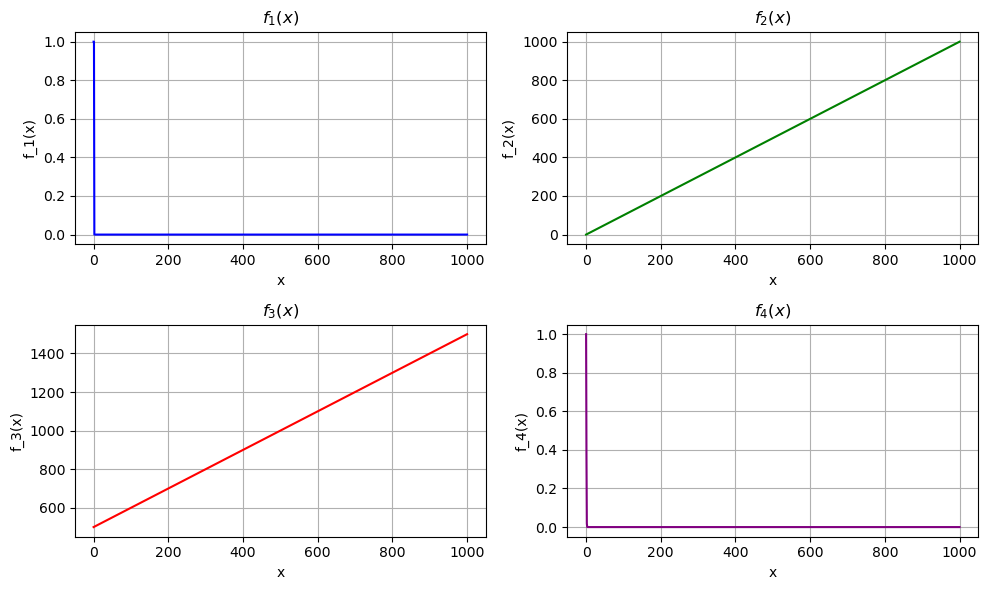

In [189]:
# Definir las funciones
def f1(x):
    return np.where(np.abs(x) <= 2, 1, 0)

def f2(x):
    return x

def f3(x):
    return x + 500

def f4(x):
    return np.exp(-x**2)

# Rango de valores para x
x = np.linspace(0, 1000, 1000)

# Graficar funciones
plt.figure(figsize=(10, 6))

# f_1(x)
plt.subplot(2, 2, 1)
plt.plot(x, f1(x), label=r'$f_1(x)$', color='blue')
plt.title(r'$f_1(x)$')
plt.xlabel('x')
plt.ylabel('f_1(x)')
plt.grid(True)

# f_2(x)
plt.subplot(2, 2, 2)
plt.plot(x, f2(x), label=r'$f_2(x)$', color='green')
plt.title(r'$f_2(x)$')
plt.xlabel('x')
plt.ylabel('f_2(x)')
plt.grid(True)

# f_3(x)
plt.subplot(2, 2, 3)
plt.plot(x, f3(x), label=r'$f_3(x)$', color='red')
plt.title(r'$f_3(x)$')
plt.xlabel('x')
plt.ylabel('f_3(x)')
plt.grid(True)

# f_4(x)
plt.subplot(2, 2, 4)
plt.plot(x, f4(x), label=r'$f_4(x)$', color='purple')
plt.title(r'$f_4(x)$')
plt.xlabel('x')
plt.ylabel('f_4(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 4.2. Calcule la transformada de Fourier de cada una

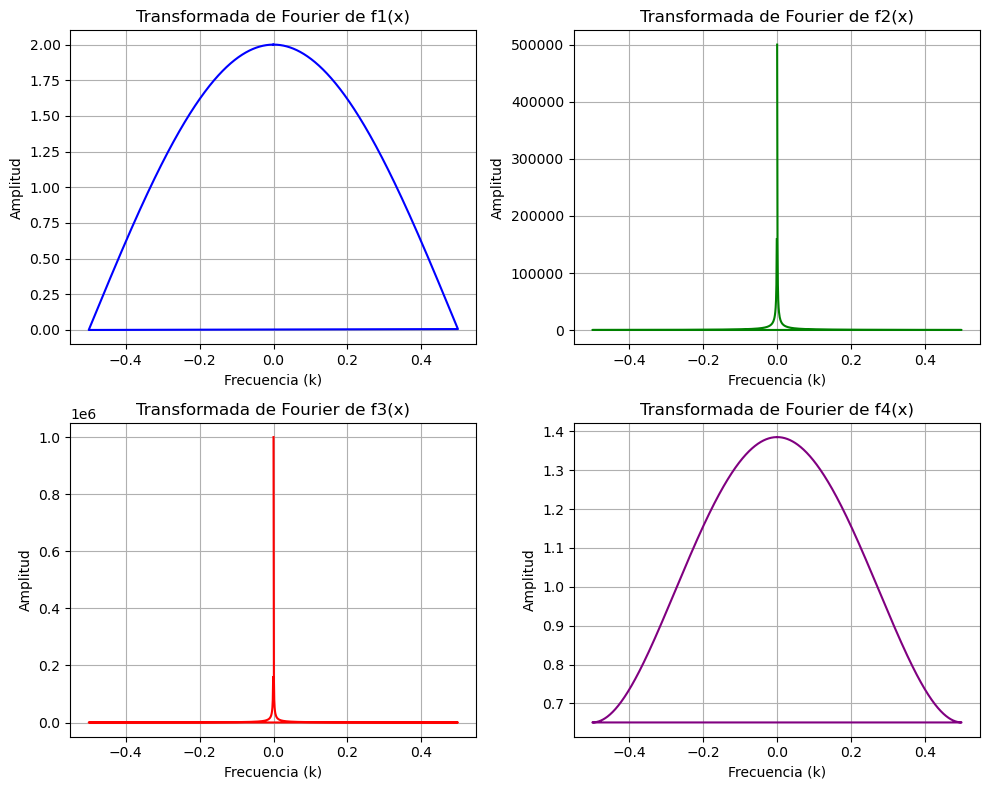

In [192]:
# Definir el dominio de x
x = np.linspace(0, 1000, 1000)

# Definir funciones
f1 = np.where(np.abs(x) <= 2, 1, 0)  # f1(x) = 1 para |x| <= 2, 0 para |x| > 2
f2 = x  # f2(x) = x
f3 = x + 500  # f3(x) = x + 500
f4 = np.exp(-x**2)  # f4(x) = exp(-x^2)

# Calcular transformadas de Fourier de cada función
F1_k = np.fft.fft(f1)  # Transformada de Fourier de f1
F2_k = np.fft.fft(f2)  # Transformada de Fourier de f2
F3_k = np.fft.fft(f3)  # Transformada de Fourier de f3
F4_k = np.fft.fft(f4)  # Transformada de Fourier de f4

# Calcular frecuencias 
dx = x[1] - x[0]  # Paso en el dominio x
k = np.fft.fftfreq(len(x), dx)  # Frecuencias en el dominio k

# Grafica transformadas de Fourier
plt.figure(figsize=(10, 8))

# Gráfica f1
plt.subplot(2, 2, 1)
plt.plot(k, np.abs(F1_k), label='Transformada de Fourier de f1(x)', color='blue')
plt.title('Transformada de Fourier de f1(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f2
plt.subplot(2, 2, 2)
plt.plot(k, np.abs(F2_k), label='Transformada de Fourier de f2(x)', color='green')
plt.title('Transformada de Fourier de f2(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f3
plt.subplot(2, 2, 3)
plt.plot(k, np.abs(F3_k), label='Transformada de Fourier de f3(x)', color='red')
plt.title('Transformada de Fourier de f3(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f4
plt.subplot(2, 2, 4)
plt.plot(k, np.abs(F4_k), label='Transformada de Fourier de f4(x)', color='purple')
plt.title('Transformada de Fourier de f4(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 4.3. Calcule la transformada discreta seno de Fourier (usar "scipy.ffpack")

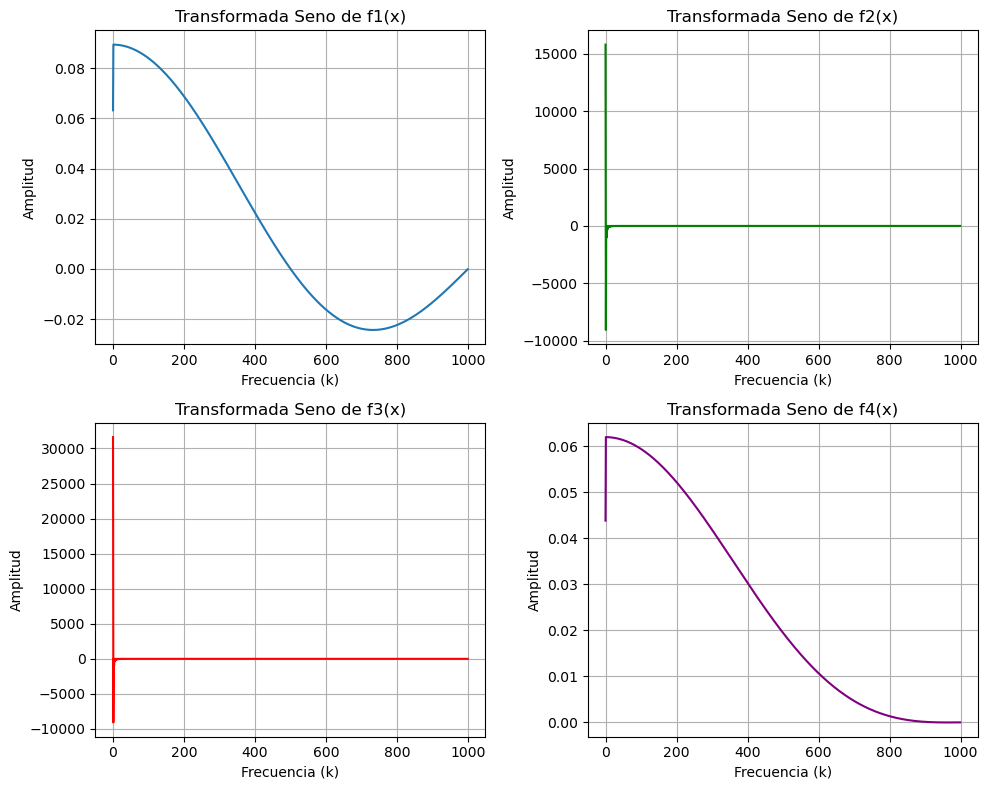

In [195]:
from scipy.fftpack import dct

# Calcular la Transformada Discreta de Fourier Seno para cada función
F1_sin = dct(f1, type=2, norm='ortho')  # Transformada Seno de f1
F2_sin = dct(f2, type=2, norm='ortho')  # Transformada Seno de f2
F3_sin = dct(f3, type=2, norm='ortho')  # Transformada Seno de f3
F4_sin = dct(f4, type=2, norm='ortho')  # Transformada Seno de f4

# Graficar transformadas de Fourier Seno
plt.figure(figsize=(10, 8))

# Gráfica f1
plt.subplot(2, 2, 1)
plt.plot(F1_sin, label='Transformada Seno de f1(x)')
plt.title('Transformada Seno de f1(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f2
plt.subplot(2, 2, 2)
plt.plot(F2_sin, label='Transformada Seno de f2(x)', color='green')
plt.title('Transformada Seno de f2(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f3
plt.subplot(2, 2, 3)
plt.plot(F3_sin, label='Transformada Seno de f3(x)', color='red')
plt.title('Transformada Seno de f3(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f4
plt.subplot(2, 2, 4)
plt.plot(F4_sin, label='Transformada Seno de f4(x)', color='purple')
plt.title('Transformada Seno de f4(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

#### 4.3.1. En una misma gráfica, pero una para cada función, graficar la parte real, la parte imaginaria y el valor absoluto (√F*conjugado) de la transformada de Fourier.

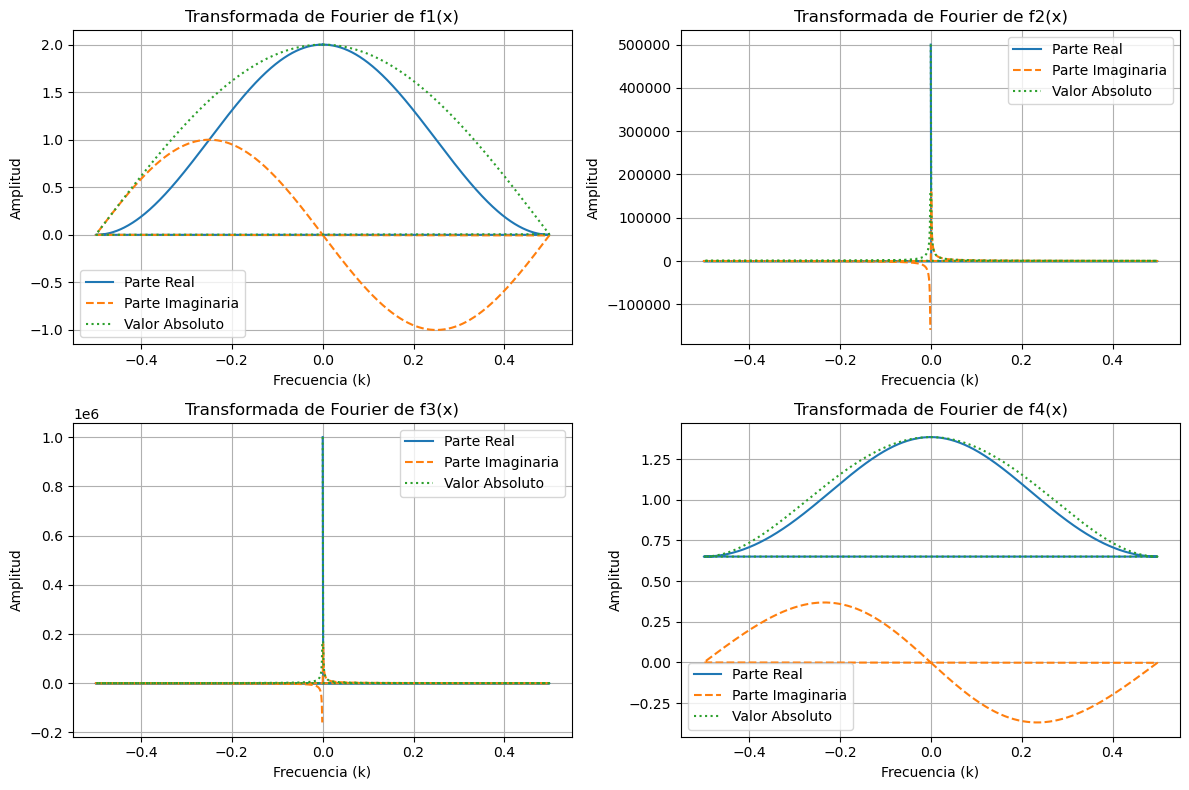

In [198]:
# Calcular transformada de Fourier de cada función
F1 = fft(f1)
F2 = fft(f2)
F3 = fft(f3)
F4 = fft(f4)

# Calcular frecuencias
frequencies = fftfreq(len(x), x[1] - x[0])

# Grafica parte real, imaginaria y valor absoluto de la transformada de Fourier
plt.figure(figsize=(12, 8))

# Gráfica f1
plt.subplot(2, 2, 1)
plt.plot(frequencies, np.real(F1), label='Parte Real')
plt.plot(frequencies, np.imag(F1), label='Parte Imaginaria', linestyle='--')
plt.plot(frequencies, np.abs(F1), label='Valor Absoluto', linestyle=':')
plt.title('Transformada de Fourier de f1(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Gráfica f2
plt.subplot(2, 2, 2)
plt.plot(frequencies, np.real(F2), label='Parte Real')
plt.plot(frequencies, np.imag(F2), label='Parte Imaginaria', linestyle='--')
plt.plot(frequencies, np.abs(F2), label='Valor Absoluto', linestyle=':')
plt.title('Transformada de Fourier de f2(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Gráfica f3
plt.subplot(2, 2, 3)
plt.plot(frequencies, np.real(F3), label='Parte Real')
plt.plot(frequencies, np.imag(F3), label='Parte Imaginaria', linestyle='--')
plt.plot(frequencies, np.abs(F3), label='Valor Absoluto', linestyle=':')
plt.title('Transformada de Fourier de f3(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Gráfica f4
plt.subplot(2, 2, 4)
plt.plot(frequencies, np.real(F4), label='Parte Real')
plt.plot(frequencies, np.imag(F4), label='Parte Imaginaria', linestyle='--')
plt.plot(frequencies, np.abs(F4), label='Valor Absoluto', linestyle=':')
plt.title('Transformada de Fourier de f4(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### 4.4. Calcule la transformada discreta coseno de Fourier

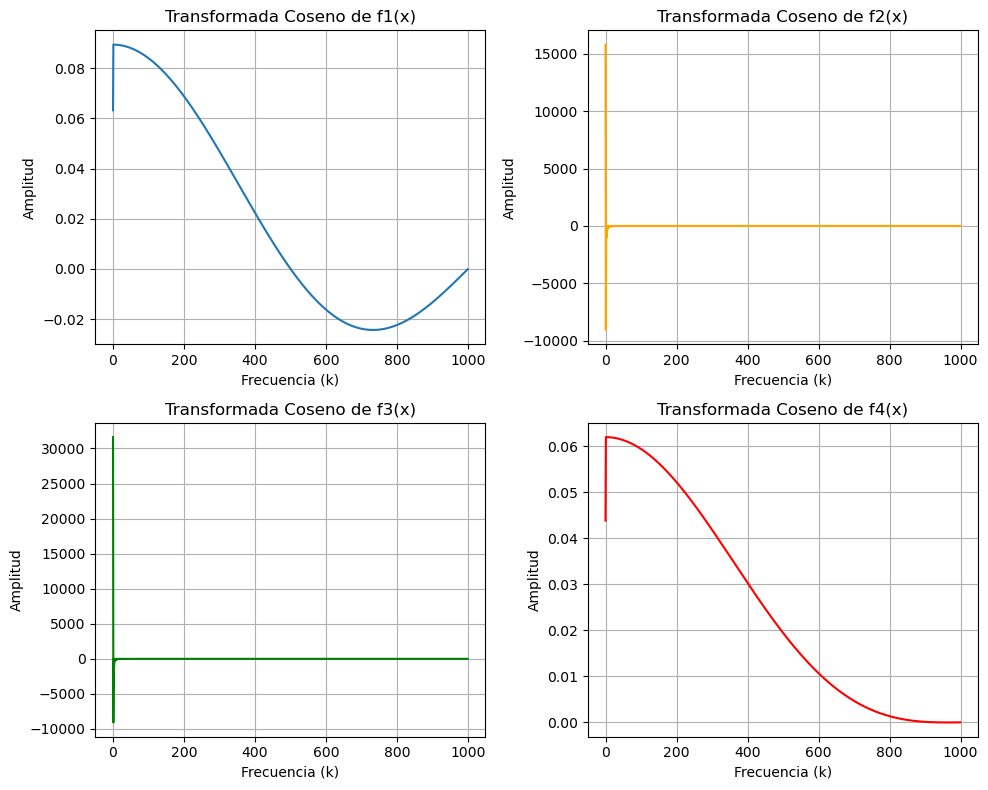

In [201]:
# Calcular Transformada Discreta Coseno para cada función
F1_cos = dct(f1, type=2, norm='ortho')  # DCT de f1
F2_cos = dct(f2, type=2, norm='ortho')  # DCT de f2
F3_cos = dct(f3, type=2, norm='ortho')  # DCT de f3
F4_cos = dct(f4, type=2, norm='ortho')  # DCT de f4

# Graficar transformadas de Fourier Coseno
plt.figure(figsize=(10, 8))

# Gráfica f1
plt.subplot(2, 2, 1)
plt.plot(F1_cos, label='Transformada Coseno de f1(x)')
plt.title('Transformada Coseno de f1(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f2
plt.subplot(2, 2, 2)
plt.plot(F2_cos, label='Transformada Coseno de f2(x)', color='orange')
plt.title('Transformada Coseno de f2(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f3
plt.subplot(2, 2, 3)
plt.plot(F3_cos, label='Transformada Coseno de f3(x)', color='green')
plt.title('Transformada Coseno de f3(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfica f4
plt.subplot(2, 2, 4)
plt.plot(F4_cos, label='Transformada Coseno de f4(x)', color='red')
plt.title('Transformada Coseno de f4(x)')
plt.xlabel('Frecuencia (k)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 4.4.1. En una misma gráfica, pero una para cada función, graficar la transformada seno y la transformada coseno.

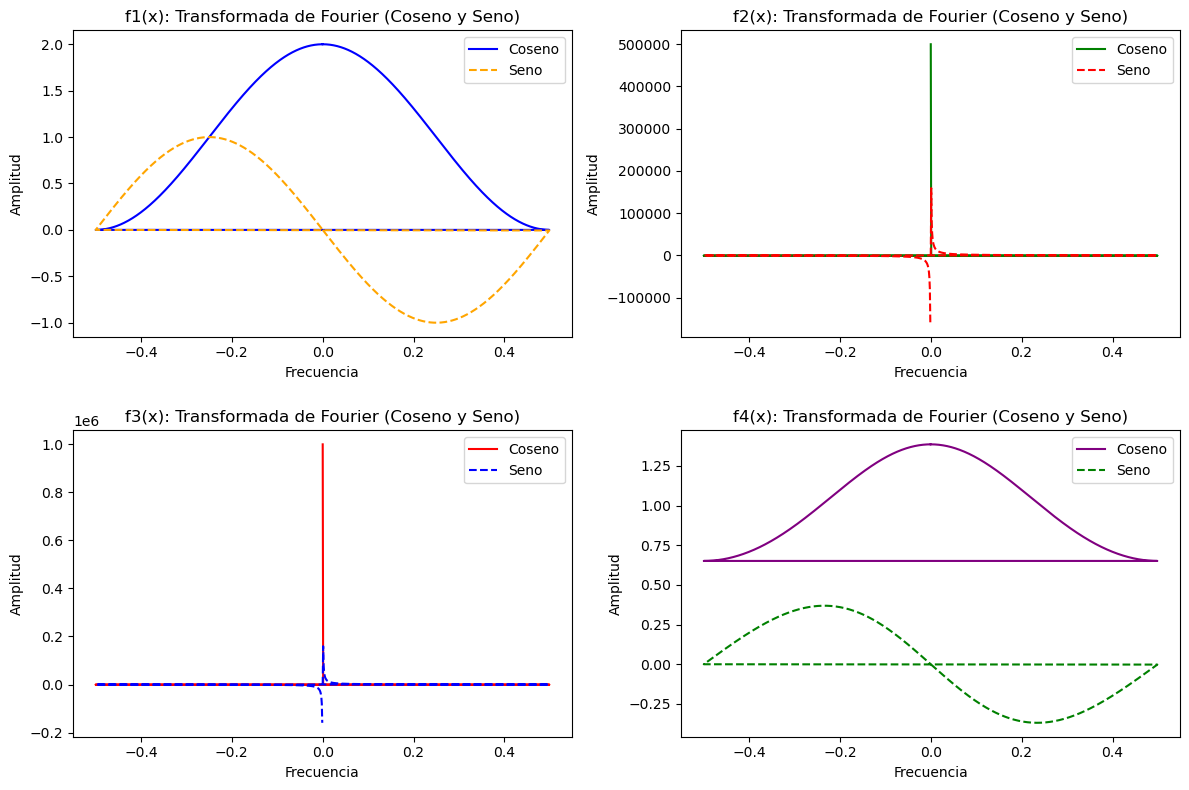

In [204]:
# Calcular transformada de Fourier continua (aproximada por fft)
F1 = np.fft.fft(f1)
F2 = np.fft.fft(f2)
F3 = np.fft.fft(f3)
F4 = np.fft.fft(f4)

# Eje de frecuencias
N = len(x)
frequencies = np.fft.fftfreq(N, d=(x[1] - x[0]))  # Eje de frecuencia

# Separar la parte real (coseno) y la parte imaginaria (seno) de la transformada
F1_real = np.real(F1)
F1_imag = np.imag(F1)

F2_real = np.real(F2)
F2_imag = np.imag(F2)

F3_real = np.real(F3)
F3_imag = np.imag(F3)

F4_real = np.real(F4)
F4_imag = np.imag(F4)

# Graficar transformada de Fourier 
plt.figure(figsize=(12, 8))

# Para f_1(x)
plt.subplot(2, 2, 1)
plt.plot(frequencies, F1_real, label='Coseno', color='b')
plt.plot(frequencies, F1_imag, label='Seno', color='orange', linestyle='--')
plt.title('f1(x): Transformada de Fourier (Coseno y Seno)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()

# Para f_2(x)
plt.subplot(2, 2, 2)
plt.plot(frequencies, F2_real, label='Coseno', color='green')
plt.plot(frequencies, F2_imag, label='Seno', color='red', linestyle='--')
plt.title('f2(x): Transformada de Fourier (Coseno y Seno)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()

# Para f_3(x)
plt.subplot(2, 2, 3)
plt.plot(frequencies, F3_real, label='Coseno', color='red')
plt.plot(frequencies, F3_imag, label='Seno', color='b', linestyle='--')
plt.title('f3(x): Transformada de Fourier (Coseno y Seno)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()

# Para f_4(x)
plt.subplot(2, 2, 4)
plt.plot(frequencies, F4_real, label='Coseno', color='purple')
plt.plot(frequencies, F4_imag, label='Seno', color='green', linestyle='--')
plt.title('f4(x): Transformada de Fourier (Coseno y Seno)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


#### 4.5. Comente: ¿Cómo se compara cada transformada? ¿Qué partes de la función tiene cada transformada y qué partes faltan? ¿Para qué funciones son iguales las transformadas de Fourier y las de seno y coseno?

Cada transformada de Fourier representa diferentes componentes de las frecuencias, es decir, dicha transformada abarca toda la información de la función original, tanto la parte real como la imaginaria. Asimismo, las transformadas de seno y coseno abarcan un espacio más específico de datos, dando paso a la pérdida de información de la fase. En este segundo caso, la información puede estar parcialmente representada o incompleta, debido a su implementación discreta.

Por otra parte, se puede decir que para las funciones puras, las transformadas de Fourier y las de seno y coseno coinciden. No obstante, no se debe olvidar que para funciones que se establecen de manera más general, la transformada de Fourier es más completa para obtener una representación más exacta. 

# Ejercicio 5. Transformada de Fourier de puntos en 2D

### Descripción

Para contruir lo solicitado se utiliza la función "np.zeros" de NumpPy, para luego cambiar las entradas a 1, mediante los índices correspondientes de cada array. Seguidamente, para calcular la transformada bidimensional de Fourier se utiliza nuevamente la función "np.fft.fft2", la cual realiza la transformada en 2D. Finalmente, para graficar las partes reales e imaginarias se requiere la función "imshow", pero antes se obtiene la parte real y la imaginaria mediante "np.real" y "np.imag" respectivamente. De esta forma, el resultado corresponde a tres filas de gráficos, donde se muestra la parte real y la parte imaginaria de la transformada de Fourier de cada array.

#### 5.1. Construya tres arrays bidimensionales con 30 entradas en cada dirección, y llénelos de ceros

In [211]:
# Arrays bidimensionales de 30x30 llenos de ceros
array1 = np.zeros((30, 30))
array2 = np.zeros((30, 30))
array3 = np.zeros((30, 30))

#### 5.2. Cambie las entradas como lo muestra el enunciado

In [214]:
# Cambiar entradas a 1
array1[5, 5] = 1
array1[5, 10] = 1
array2[5, 5] = 1
array2[25, 5] = 1
array3[10, 15] = 1
array3[25, 20] = 1

#### 5.3. Calcule la transformada bidimensional de Fourier para cada array

In [217]:
# Calcular la transformada bidimensional de Fourier para cada array
fft_array1 = np.fft.fft2(array1)
fft_array2 = np.fft.fft2(array2)
fft_array3 = np.fft.fft2(array3)

#### 5.4. Grafique las partes reales e imaginarias de cada array transformado (imshow o pcolormesh en Python)

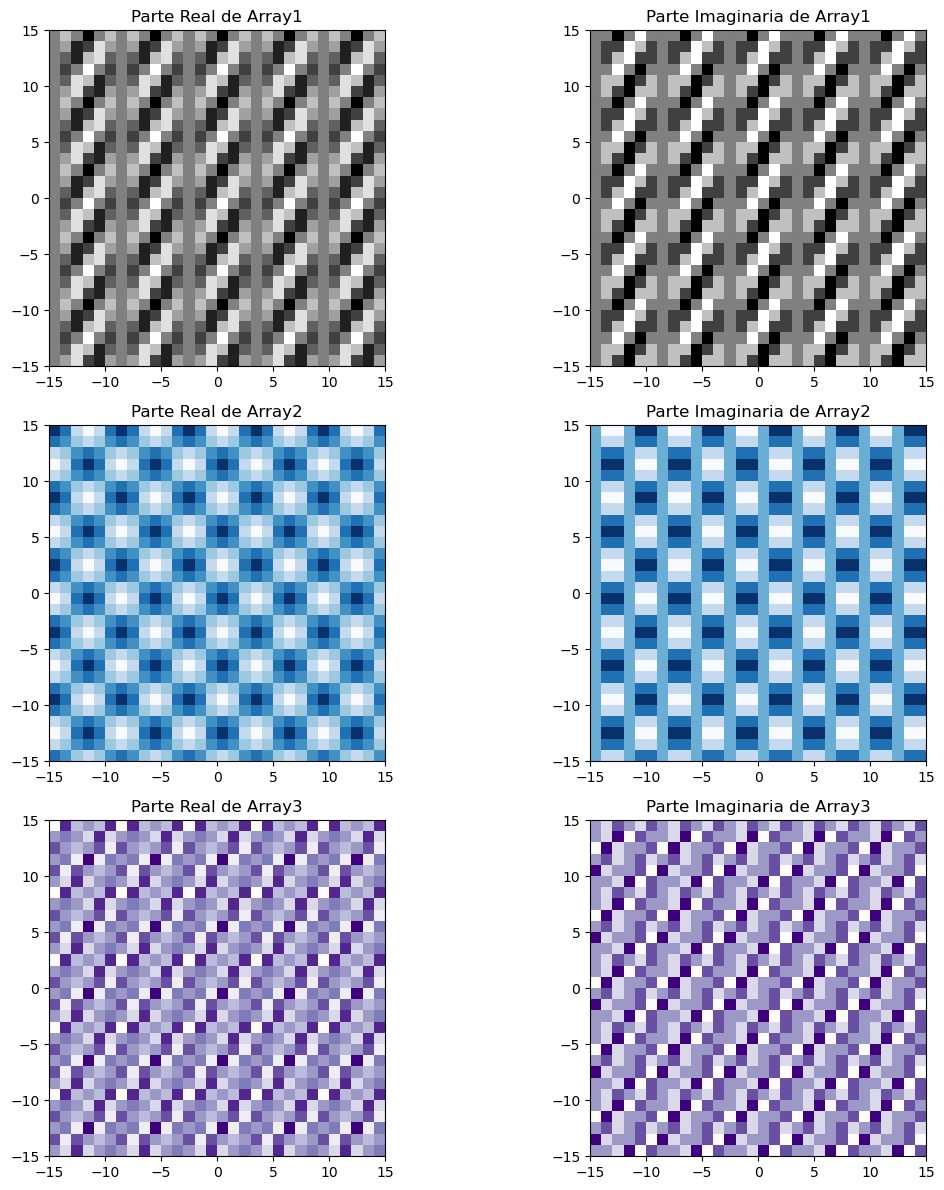

In [220]:
# Desplazar el cero de la transformada al centro
fft_array1_shifted = np.fft.fftshift(fft_array1)
fft_array2_shifted = np.fft.fftshift(fft_array2)
fft_array3_shifted = np.fft.fftshift(fft_array3)

# Calcular parte real e imaginaria de las transformadas
real_fft1 = np.real(fft_array1_shifted)
imag_fft1 = np.imag(fft_array1_shifted)

real_fft2 = np.real(fft_array2_shifted)
imag_fft2 = np.imag(fft_array2_shifted)

real_fft3 = np.real(fft_array3_shifted)
imag_fft3 = np.imag(fft_array3_shifted)

# Graficar partes reales e imaginarias
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Array 1
axes[0, 0].imshow(real_fft1, cmap='gray', extent=[-15, 15, -15, 15])
axes[0, 0].set_title('Parte Real de Array1')
axes[0, 1].imshow(imag_fft1, cmap='gray', extent=[-15, 15, -15, 15])
axes[0, 1].set_title('Parte Imaginaria de Array1')

# Array 2
axes[1, 0].imshow(real_fft2, cmap='Blues', extent=[-15, 15, -15, 15])
axes[1, 0].set_title('Parte Real de Array2')
axes[1, 1].imshow(imag_fft2, cmap='Blues', extent=[-15, 15, -15, 15])
axes[1, 1].set_title('Parte Imaginaria de Array2')

# Array 3
axes[2, 0].imshow(real_fft3, cmap='Purples', extent=[-15, 15, -15, 15])
axes[2, 0].set_title('Parte Real de Array3')
axes[2, 1].imshow(imag_fft3, cmap='Purples', extent=[-15, 15, -15, 15])
axes[2, 1].set_title('Parte Imaginaria de Array3')

plt.tight_layout()
plt.show()


#### 5.5. Basado en los resultados, conteste: ¿Qué pasa con la transformada cuando las entradas que son 1 ("puntos") se acercan o alejan? ¿Qué pasa cuando esos puntos se rotan 90º? ¿Qué pasa si esos puntos se mueven en un ángulo distinto?

Cuando los puntos están más cerca, la transformada de Fourier muestra una distribuación más amplia de frecuencias, caso contrario a cuando están más lejos, ya que se denota una distribución más concentrada y con patrones de interferencia más definidos. 

Por otra parte, cuando esos puntos se rotan 90°, la transformada también rota de la misma manera. 

Finalmente, si los puntos se mueven en un ángulo distinto, la transformada se comporta de igual manera, desplazándose en la misma dirección y ángulo. En otras palabras, la transformada de Fourier sigue la orientación de los puntos. 


